In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_all = pd.read_csv('banijay_op1data_content_ratings.csv', sep= ",", compression='zip')

In [4]:
print(df_all.columns)

Index(['Unnamed: 0', 'Unnamed: 0_x', 'date', 'hosts', 'id', 'length', 'start',
       'end', 'title', 'summary', 'keywords', 'date_time_start',
       'date_time_end', 'show_id', 'fragment', 'Unnamed: 0_y', 'Datum', 'Time',
       'Program', 'Station', 'Target Group', 'Broadcast Type', 'Ratings Type',
       'Kdh%', 'Kdh000', 'Zadl%', 'date_time', 'content_id'],
      dtype='object')


---
### Target Audience Analysis
---

In [5]:
df_all["Kdh000"].mean()

208.25043859183148

In [8]:
print(df_all["Target Group"].unique())

['tot6plus' 'boodschapper_20_49' 'boodschapper_25_54' '6_12_jr' '13_19_jr'
 '20_34_jr' '35_49_jr' '50plus_jr' 'm_6plus_jr' 'v_6plus_jr' nan]


In [9]:
df_all.groupby("Target Group")["Kdh000"].mean()

Target Group
13_19_jr                5.587279
20_34_jr               22.673923
35_49_jr               58.784992
50plus_jr             538.793347
6_12_jr                 3.391958
boodschapper_20_49     51.736065
boodschapper_25_54     70.626938
m_6plus_jr            305.638966
tot6plus              626.427932
v_6plus_jr            320.788525
Name: Kdh000, dtype: float64

---
# Content Analysis
---

In [11]:
hosts = df_all.groupby(["hosts"])["Kdh000"].mean().sort_values(ascending= False)
hosts

hosts
['Pauw, Jeroen', 'Ekiz, Fidan']                                                                                     326.537392
['Napel, Carrie ten', 'Groenhuijsen, Charles', 'Sijtsma, Welmoed']                                                  322.920066
['Ekiz, Fidan', 'Pauw, Jeroen']                                                                                     318.015574
['Ostiana, Giovanca', 'Brink, Tijs van den', 'Fikse, Margje']                                                       311.296935
['Sijtsma, Welmoed', 'Groenhuijsen, Charles']                                                                       302.774795
['Kockelmann, Sven', 'Muusse, Talitha']                                                                             288.122413
['Ostiana, Giovanca', 'Brink, Tijs van den', 'Napel, Carrie ten', 'Groenhuijsen, Charles']                          285.918673
['Kockelmann, Sven']                                                                                     

In [12]:
shows = df_all.groupby(["title", "fragment"])["Kdh000"].mean().sort_values(ascending= False)
shows


title                                                                                                                                                 fragment
Ab Osterhaus, Rob Jetten en Max Daniel over of de politiek meer in actie moet komen                                                                   1           488.208214
Het LUMC werkt aan virusremmer tegen het coronavirus                                                                                                  2           466.870394
Hoe waarschuw je kinderen en jongeren over het coronavirus? Joris Marseille en Saskia Smith vertellen het                                             3           459.579559
Laila Frank, Raymond Mens, Maarten van Rossem, Tijs van den Brink en Kirsten Verdel over de huidige situatie in Amerika                               1           443.206767
Eppo van Nispen met de mooiste historische sneeuwbeelden                                                                                             

In [13]:
df_all.groupby(["Unnamed: 0", "id", "fragment","keywords"])["Kdh000"].mean().sort_values(ascending= False).head(5)


Unnamed: 0  id                            fragment  keywords                                  
728739      OP1__________-WON02099483_01  1         ['43', 'politiecommandant', 'coronavirus']    2166.124546
728884      OP1__________-WON02099483_01  1         ['43', 'politiecommandant', 'coronavirus']    2163.088812
728768      OP1__________-WON02099483_01  1         ['43', 'politiecommandant', 'coronavirus']    2150.076318
728826      OP1__________-WON02099483_01  1         ['43', 'politiecommandant', 'coronavirus']    2144.819930
728855      OP1__________-WON02099483_01  1         ['43', 'politiecommandant', 'coronavirus']    2139.778413
Name: Kdh000, dtype: float64

## Bonus

In [14]:
wordCloud = df_all.iloc[[728739      ,728884      ,728768      ,728826      ,728855      ]]

In [15]:
wordCloud["keywords"]

728739    ['43', 'politiecommandant', 'coronavirus']
728884    ['43', 'politiecommandant', 'coronavirus']
728768    ['43', 'politiecommandant', 'coronavirus']
728826    ['43', 'politiecommandant', 'coronavirus']
728855    ['43', 'politiecommandant', 'coronavirus']
Name: keywords, dtype: object

In [16]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

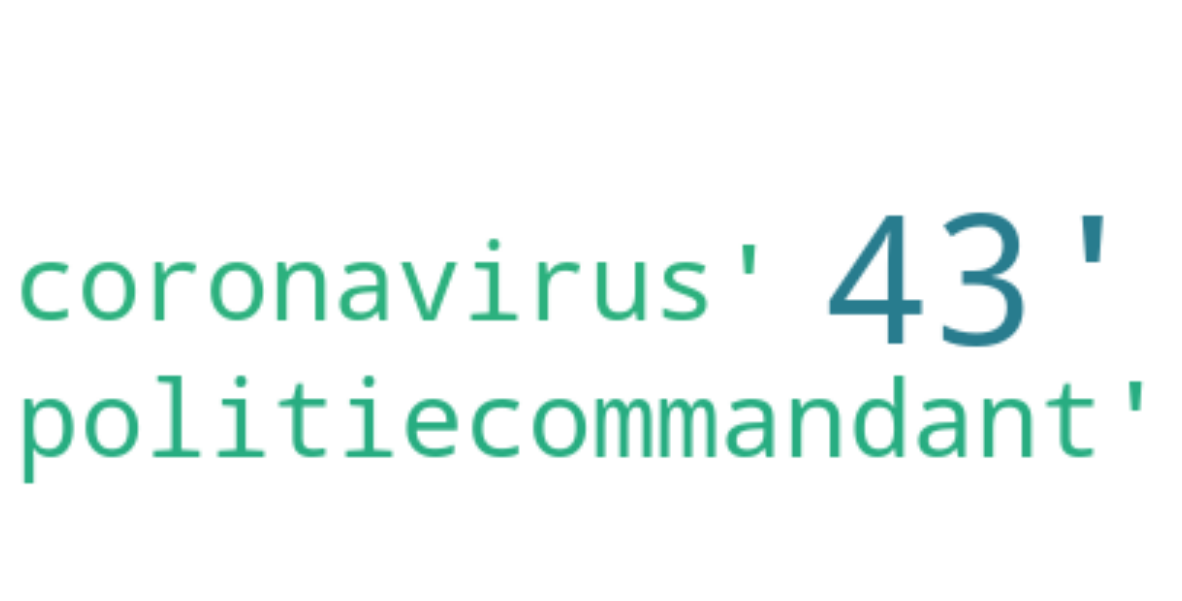

In [17]:
text = " ".join(i for i in wordCloud["keywords"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

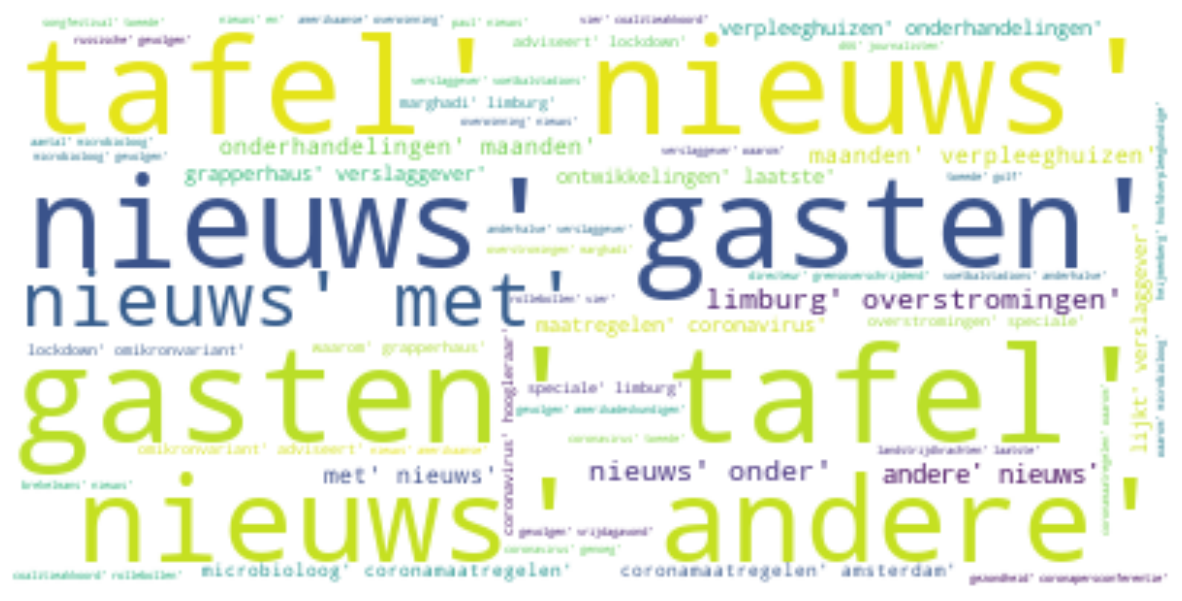

In [18]:
text = " ".join(i for i in df_all["keywords"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
# Trend Analysis
---

In [19]:
df_all["date_time"] = pd.to_datetime(df_all["date_time"])

In [20]:
df_all["date_time"] 

0         2021-02-01 22:21:00
1         2021-02-01 22:21:00
2         2021-02-01 22:21:00
3         2021-02-01 22:21:00
4         2021-02-01 22:21:00
                  ...        
1028573   2022-08-31 23:06:00
1028574   2022-08-31 23:06:00
1028575   2022-08-31 23:06:00
1028576   2022-08-31 23:06:00
1028577   2022-08-31 23:06:00
Name: date_time, Length: 1028578, dtype: datetime64[ns]

In [21]:
avarage_ratings = df_all.groupby(df_all.date_time.dt.month)['Kdh000'].mean()
avarage_ratings


date_time
1.0     221.964279
2.0     204.647483
3.0     235.307796
4.0     243.001902
5.0     222.847570
6.0     201.759211
7.0     197.279047
8.0     181.478025
9.0     167.724576
10.0    185.060397
11.0    202.898573
12.0    198.185698
Name: Kdh000, dtype: float64

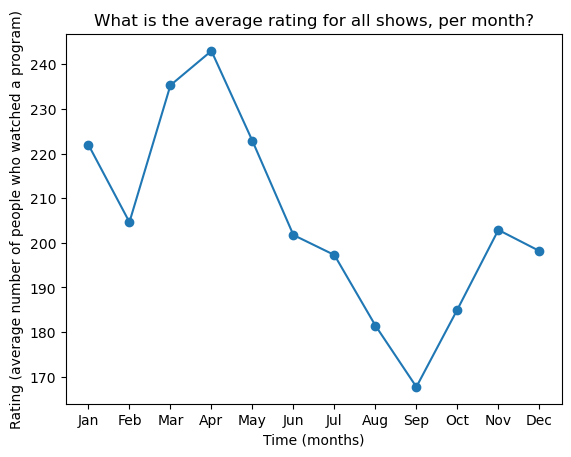

In [22]:
fig, ax = plt.subplots()
ax.plot(["Jan","Feb","Mar","Apr","May" ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"],avarage_ratings, marker = "o" )
ax.set_xlabel("Time (months)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for all shows, per month?")
plt.show()

In [23]:
avarage_ratings_day = df_all.groupby(df_all.date_time.dt.weekday)['Kdh000'].mean()
avarage_ratings_day

date_time
0.0    209.842701
1.0    198.792418
2.0    207.131399
3.0    201.130998
4.0    192.816359
5.0    274.845483
6.0    307.061921
Name: Kdh000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

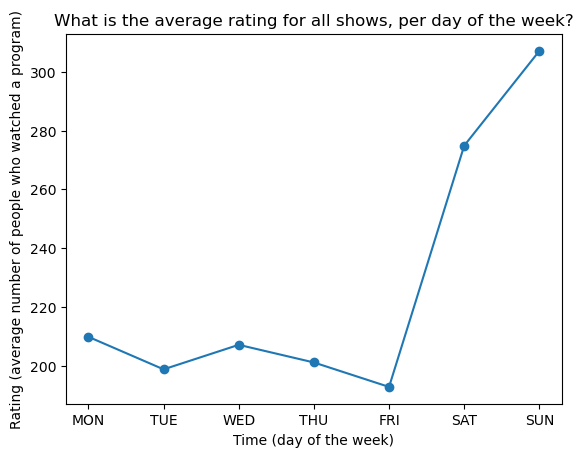

In [24]:
fig, ax = plt.subplots()
plt.plot(["MON","TUE","WED","THU","FRI","SAT","SUN"],avarage_ratings_day, marker = "o")
ax.set_xlabel("Time (day of the week)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for all shows, per day of the week?")
plt.show

In [25]:
df_all.groupby("Target Group")["Kdh000"].mean().sort_values(ascending= False)

Target Group
tot6plus              626.427932
50plus_jr             538.793347
v_6plus_jr            320.788525
m_6plus_jr            305.638966
boodschapper_25_54     70.626938
35_49_jr               58.784992
boodschapper_20_49     51.736065
20_34_jr               22.673923
13_19_jr                5.587279
6_12_jr                 3.391958
Name: Kdh000, dtype: float64

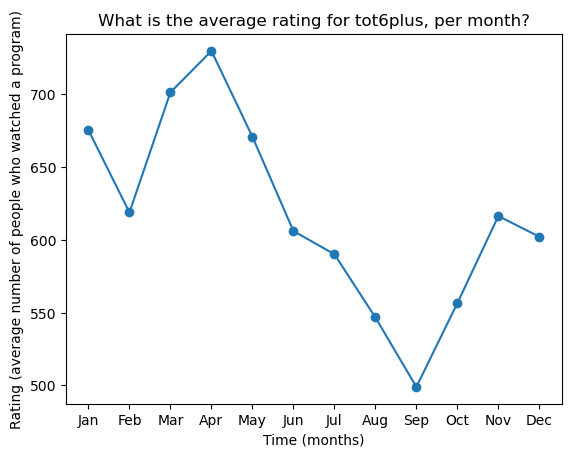

In [26]:
fig, ax = plt.subplots()
tot6plus = df_all.loc[df_all["Target Group"] =="tot6plus"]
avarage_ratings_top1 = tot6plus.groupby(df_all.date_time.dt.month)['Kdh000'].mean()
plt.plot(["Jan","Feb","Mar","Apr","May" ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"],avarage_ratings_top1, marker = "o")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for tot6plus, per month?")
plt.show()


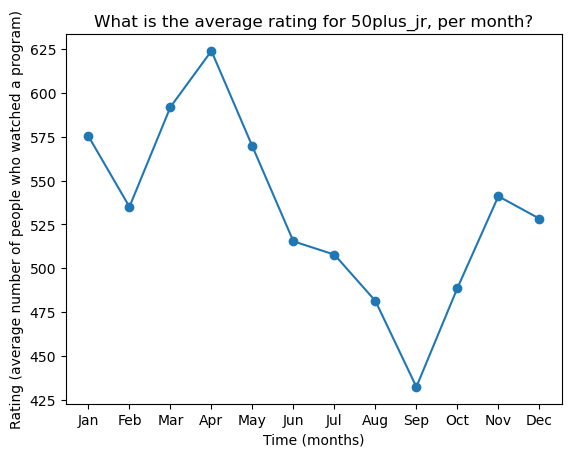

In [27]:
fig, ax = plt.subplots()
_50plus_jr = df_all.loc[df_all["Target Group"] =="50plus_jr"]
avarage_ratings_top2 = _50plus_jr.groupby(df_all.date_time.dt.month)['Kdh000'].mean()
plt.plot(["Jan","Feb","Mar","Apr","May" ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"],avarage_ratings_top2, marker = "o")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for 50plus_jr, per month?")
plt.show()

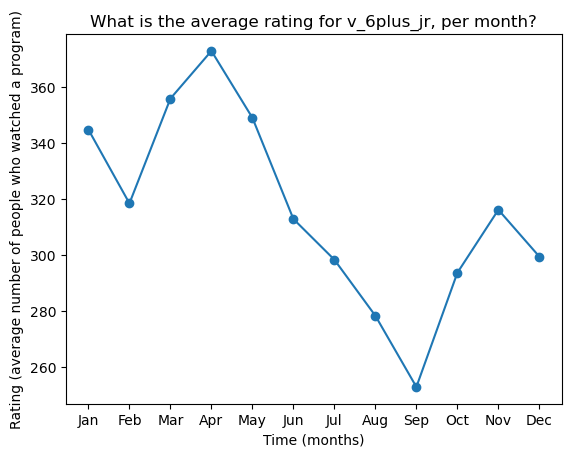

In [28]:
fig, ax = plt.subplots()
v_6plus_jr = df_all.loc[df_all["Target Group"] =="v_6plus_jr"]
avarage_ratings_top3 = v_6plus_jr.groupby(df_all.date_time.dt.month)['Kdh000'].mean()
plt.plot(["Jan","Feb","Mar","Apr","May" ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"],avarage_ratings_top3, marker = "o")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for v_6plus_jr, per month?")
plt.show()

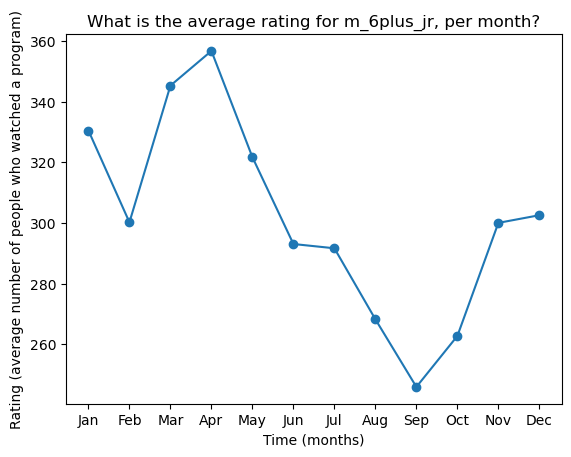

In [29]:
fig, ax = plt.subplots()
m_6plus_jr = df_all.loc[df_all["Target Group"] =="m_6plus_jr"]
avarage_ratings_top4 = m_6plus_jr.groupby(df_all.date_time.dt.month)['Kdh000'].mean()
plt.plot(["Jan","Feb","Mar","Apr","May" ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"],avarage_ratings_top4, marker = "o")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for m_6plus_jr, per month?")
plt.show()

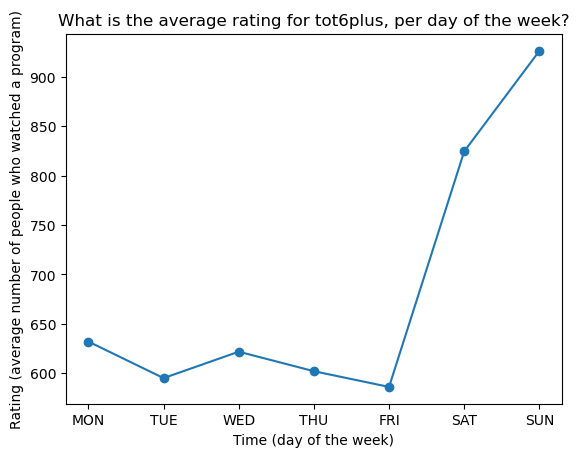

In [30]:
fig, ax = plt.subplots()
tot6plus = df_all.loc[df_all["Target Group"] =="tot6plus"]
avarage_ratings_top1 = tot6plus.groupby(df_all.date_time.dt.weekday)['Kdh000'].mean()
plt.plot(["MON","TUE","WED","THU","FRI","SAT","SUN"],avarage_ratings_top1, marker = "o")
ax.set_xlabel("Time (day of the week)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for tot6plus, per day of the week?")
plt.show()

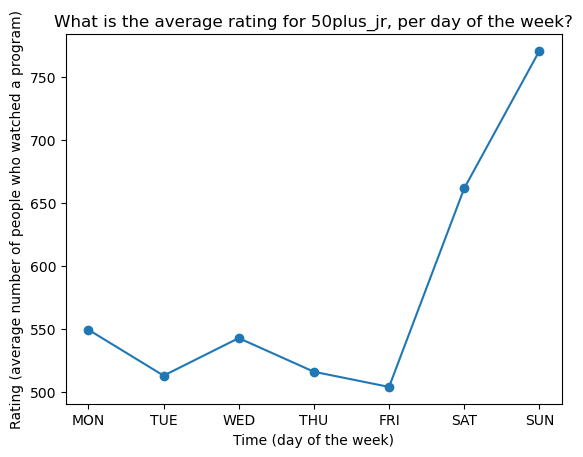

In [31]:
fig, ax = plt.subplots()
_50plus_jr = df_all.loc[df_all["Target Group"] =="50plus_jr"]
avarage_ratings_top2 = _50plus_jr.groupby(df_all.date_time.dt.weekday)['Kdh000'].mean()
plt.plot(["MON","TUE","WED","THU","FRI","SAT","SUN"],avarage_ratings_top2, marker = "o")
ax.set_xlabel("Time (day of the week)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for 50plus_jr, per day of the week?")
plt.show()

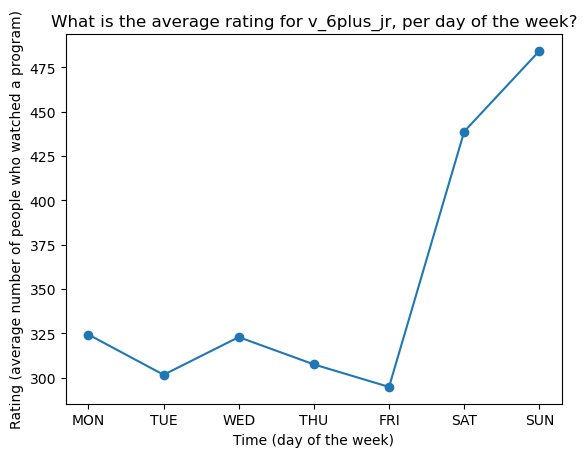

In [32]:
fig, ax = plt.subplots()
v_6plus_jr = df_all.loc[df_all["Target Group"] =="v_6plus_jr"]
avarage_ratings_top3 = v_6plus_jr.groupby(df_all.date_time.dt.weekday)['Kdh000'].mean()
plt.plot(["MON","TUE","WED","THU","FRI","SAT","SUN"],avarage_ratings_top3, marker = "o")
ax.set_xlabel("Time (day of the week)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for v_6plus_jr, per day of the week?")
plt.show()

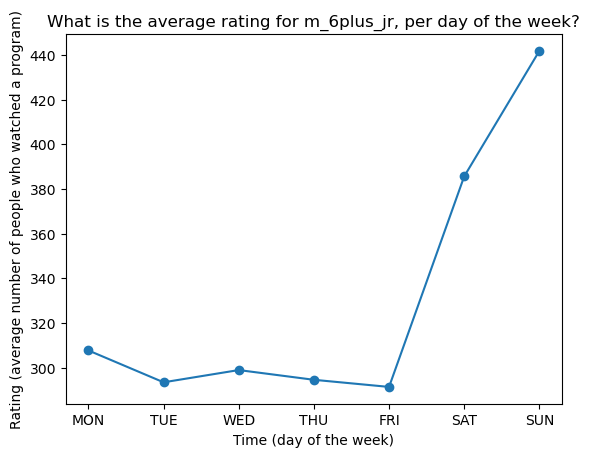

In [33]:
fig, ax = plt.subplots()
m_6plus_jr = df_all.loc[df_all["Target Group"] =="m_6plus_jr"]
avarage_ratings_top4 = m_6plus_jr.groupby(df_all.date_time.dt.weekday)['Kdh000'].mean()
plt.plot(["MON","TUE","WED","THU","FRI","SAT","SUN"],avarage_ratings_top4, marker = "o")
ax.set_xlabel("Time (day of the week)")
ax.set_ylabel("Rating (average number of people who watched a program)")
ax.set_title("What is the average rating for m_6plus_jr, per day of the week?")
plt.show()